1. Choose one variable and plot that variable four different ways.
2. Choose two continuous variables, and plot them three different ways.
3. Choose one continuous variable and one categorical variable, and plot them six different ways.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.patches as mpatches

% matplotlib inline

In [73]:
df = pd.read_csv('world_happiness_2016.csv')
#create numpy array of column values (prevents truncation that occurs with dataframe view)
list(df.columns)

# the Economic GDP values appear to be a ratio of the natural log of a countries GDP per capita (adjusted by purchasing power parity- PPP)
# and some average worldwide value (which I can't quite figure out but seems to be around 7.25) :-)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


### 1. Choose One Variable and Plot it 4 Different Ways

C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\stace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


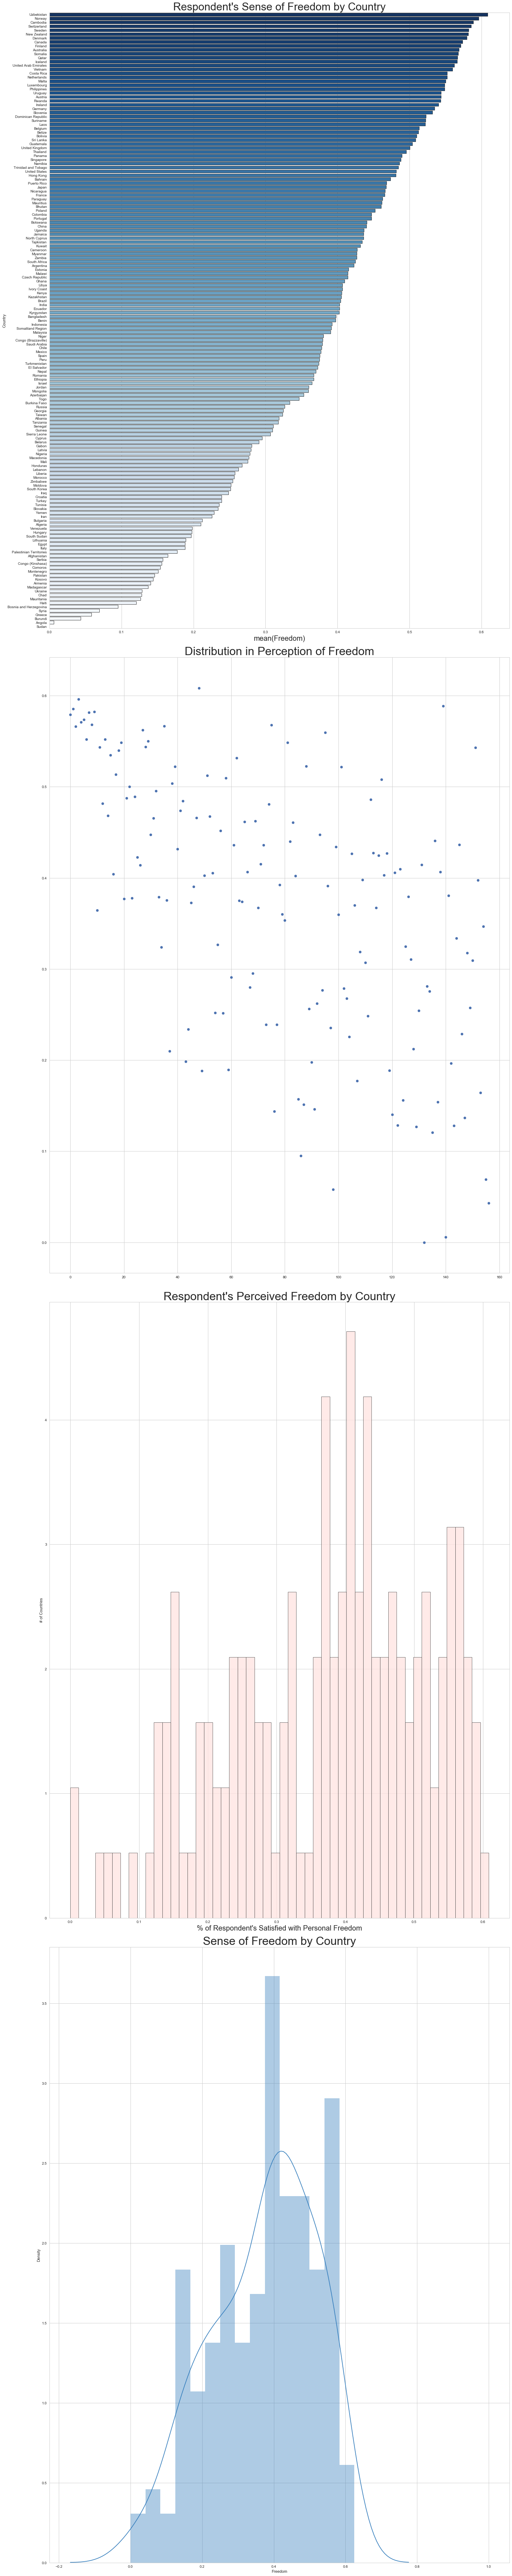

In [74]:
f, ax = plt.subplots(figsize=(20,100))
rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 50, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
plt.rcParams.update(**rc)
sns.set(style='whitegrid')

df_sorted_health = df.sort(['Freedom'], ascending=[0])

ax1=plt.subplot(411)
ax1.set_title("Respondent's Sense of Freedom by Country",fontsize='30') 
ax1.set_xlabel('% Respondents Satisfied with Freedom to Make Life Choices',fontsize='20')
sns.barplot(x='Freedom', y='Country',data=df_sorted_health, palette='Blues_r', linewidth=1,edgecolor='.2')


ax2=plt.subplot(412)
ax2.set_title("Distribution in Perception of Freedom", fontsize='32')
ax3.set_xlabel("Index", fontsize='20')
ax3.set_ylabel("% of Respondent's Satisfied with Personal Freedom", fontsize='20')
plt.scatter(x=df.index,y=df['Freedom'])

ax3=plt.subplot(413)
bins = np.linspace(0,.7,30)
ax3.set_title("Respondent's Perceived Freedom by Country", fontsize='32')
ax3.set_xlabel("% of Respondent's Satisfied with Personal Freedom", fontsize='20')
ax3.set_ylabel("# of Countries")
n, bins, patches = ax3.hist(df['Freedom'], 50, normed=1, facecolor='#FFE4E1', alpha=0.75,ec='.2',lw=1)


ax4=plt.subplot(414)
bins = np.linspace(0,1,25)
sns.set_style('whitegrid')
sns.color_palette("GnBu_d")
x=df['Freedom']
ax4.set_title("Sense of Freedom by Country", fontsize = '32')
ax4.set(xlabel='Proportion of Respondents Satisfied with Freedom to Make Choices', ylabel='Density')
sns.distplot(x, bins, color = '#357ebd')

plt.tight_layout()

### Choose two continuous variables, and plot them three different ways

1. Jointplot - scatter with regression and kernel density fit

C:\Users\stace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


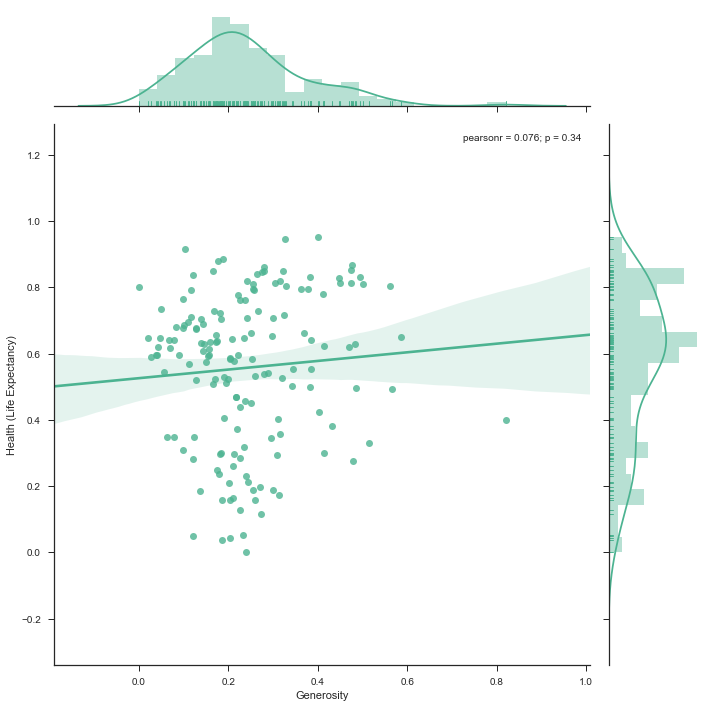

In [75]:

sns.set(style='ticks')
x = df['Generosity']
y = df['Health (Life Expectancy)']

fig = sns.jointplot(x, y, kind="reg",marginal_kws=dict(bins=20, rug=True), color="#4CB391", size=10)


2. Overlapping bar plot

C:\Users\stace\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


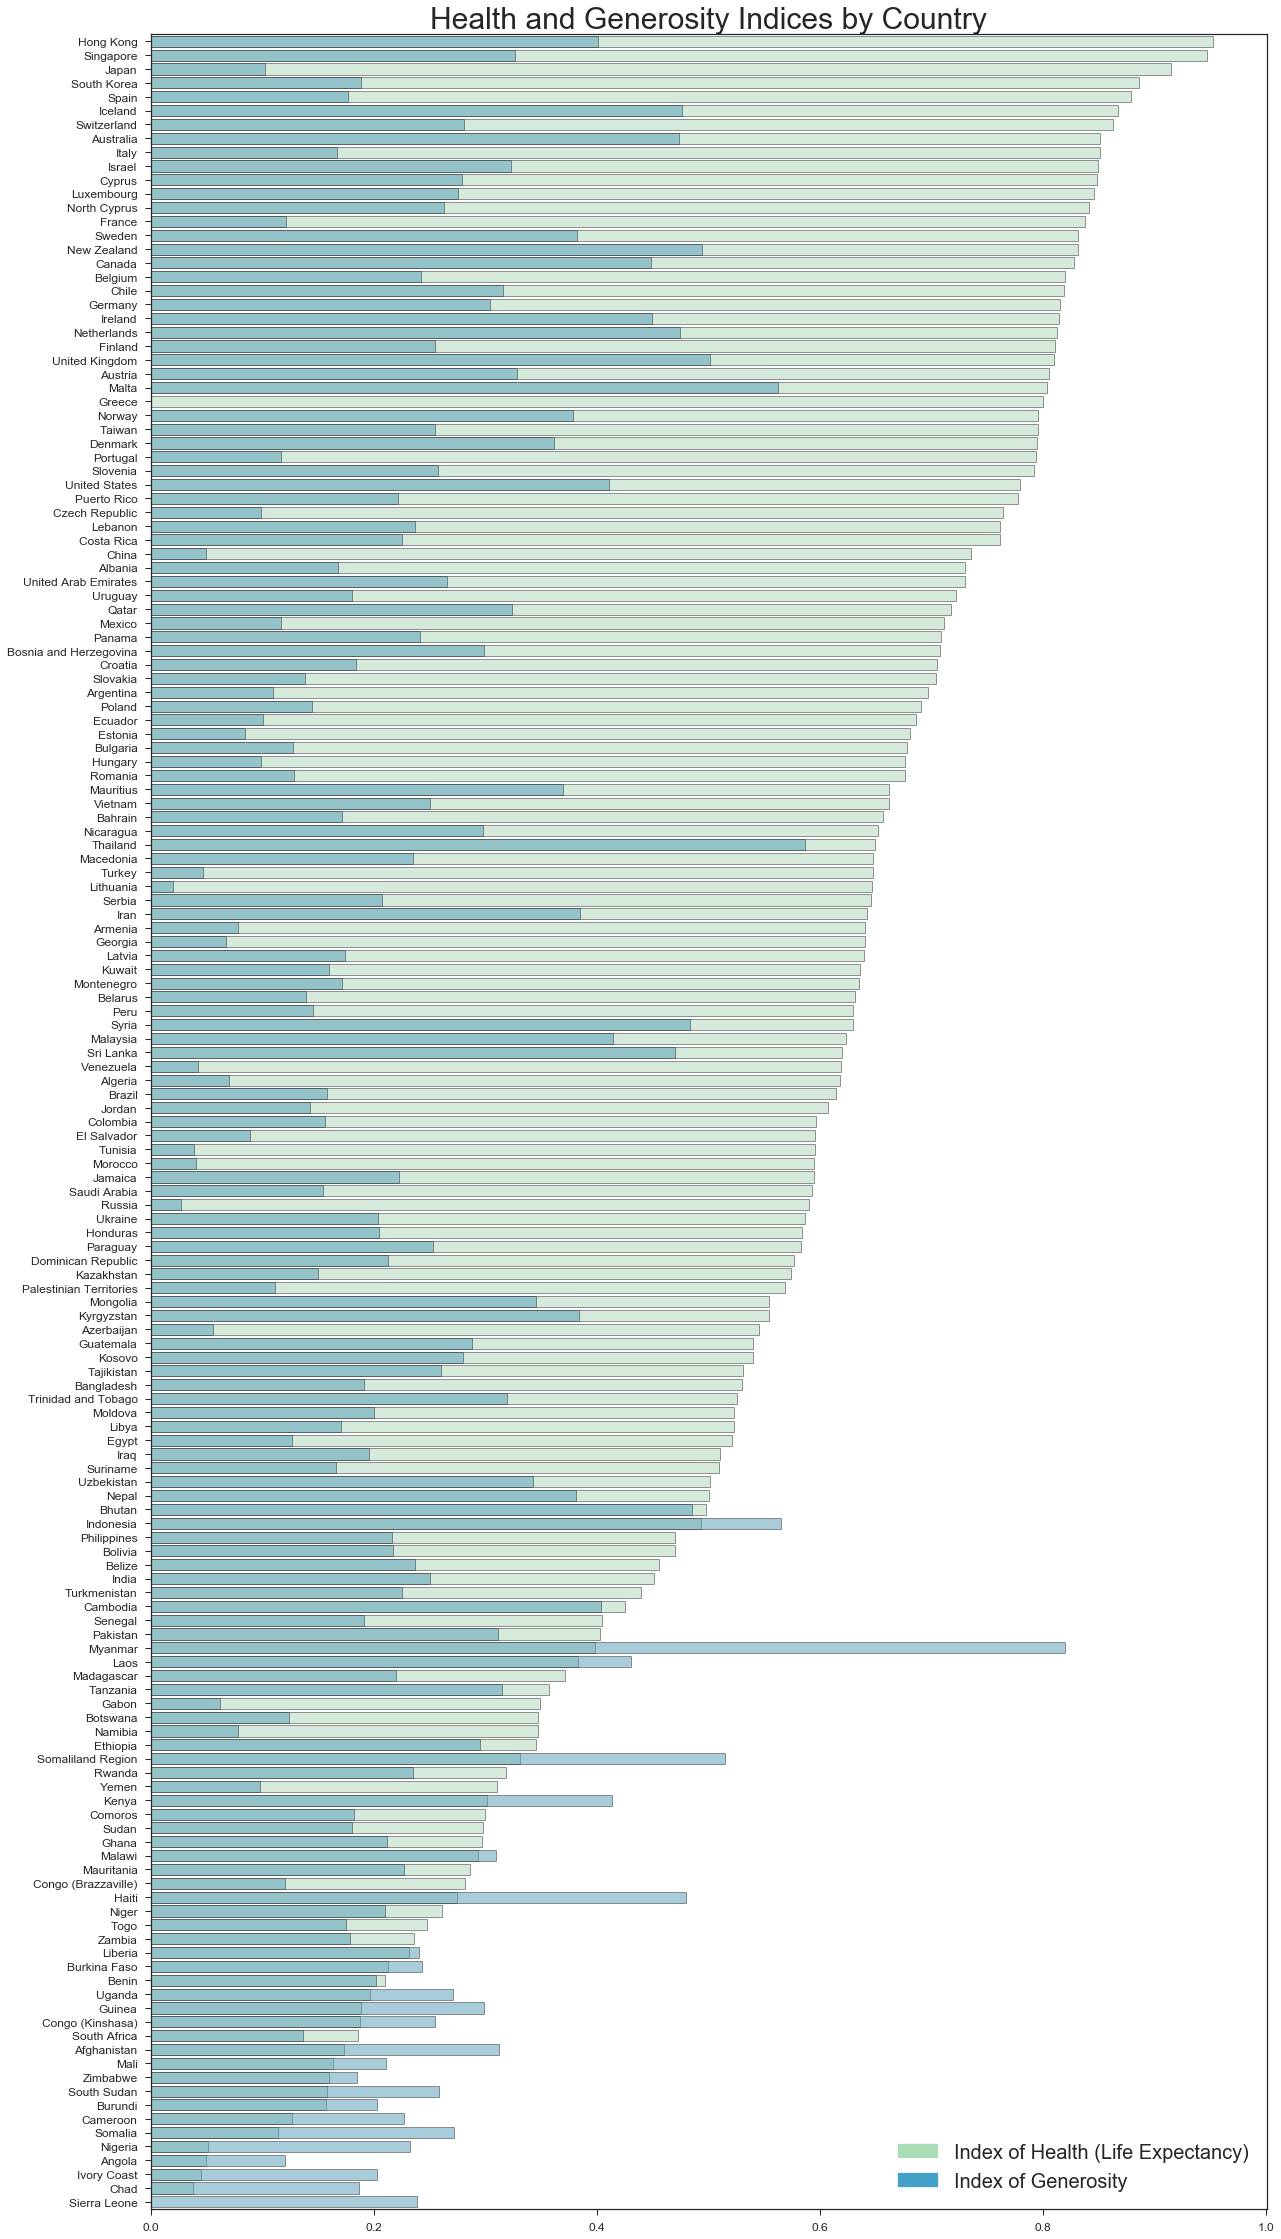

In [76]:
df_sorted_health = df.sort(['Health (Life Expectancy)'], ascending=[0])

f, ax = plt.subplots(figsize=(20,40), sharex='row')
rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 30, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
plt.rcParams.update(**rc)

colors=['#a8ddb5','#43a2ca']

#Plot Health Index
ax1 = plt.subplot(111)
sns.barplot(x="Health (Life Expectancy)", y="Country", data=df_sorted_health,color=colors[0], alpha =0.5, linewidth=1, edgecolor='.2')

# Plot Generosity Index
sns.barplot(x="Generosity", y="Country", data=df_sorted_health, color=colors[1], alpha=0.5, linewidth=1, edgecolor='.2')

green_patch = mpatches.Patch(color='#a8ddb5', label='Index of Health (Life Expectancy)')
blue_patch = mpatches.Patch(color='#43a2ca', label='Index of Generosity')

plt.legend(handles=[green_patch,blue_patch])
ax1.set(title='Health and Generosity Indices by Country', xlabel="", ylabel='')



3. Scatterplot with a joint density estimate

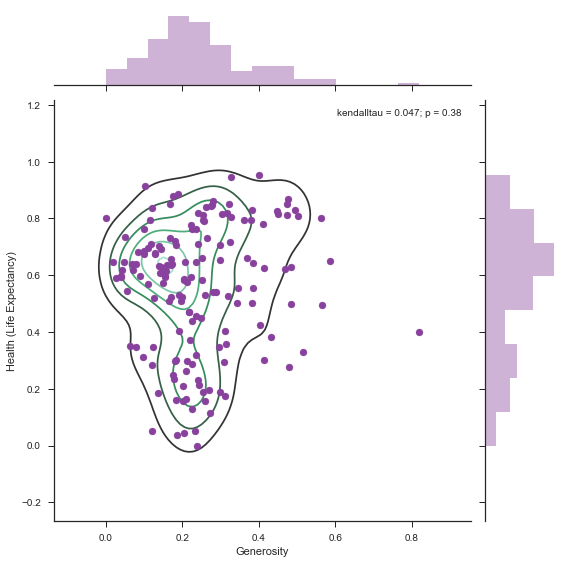

In [77]:
sns.set(style='ticks')
x = df['Generosity']
y = df['Health (Life Expectancy)']

fig = (sns.jointplot(x, y, stat_func=kendalltau, color="#88419d", size=8).plot_joint(sns.kdeplot, color="#0570b0", zorder=0, n_levels=6))

### Choose one continuous variable and one categorical variable, and plot them six different ways.

C:\Users\stace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


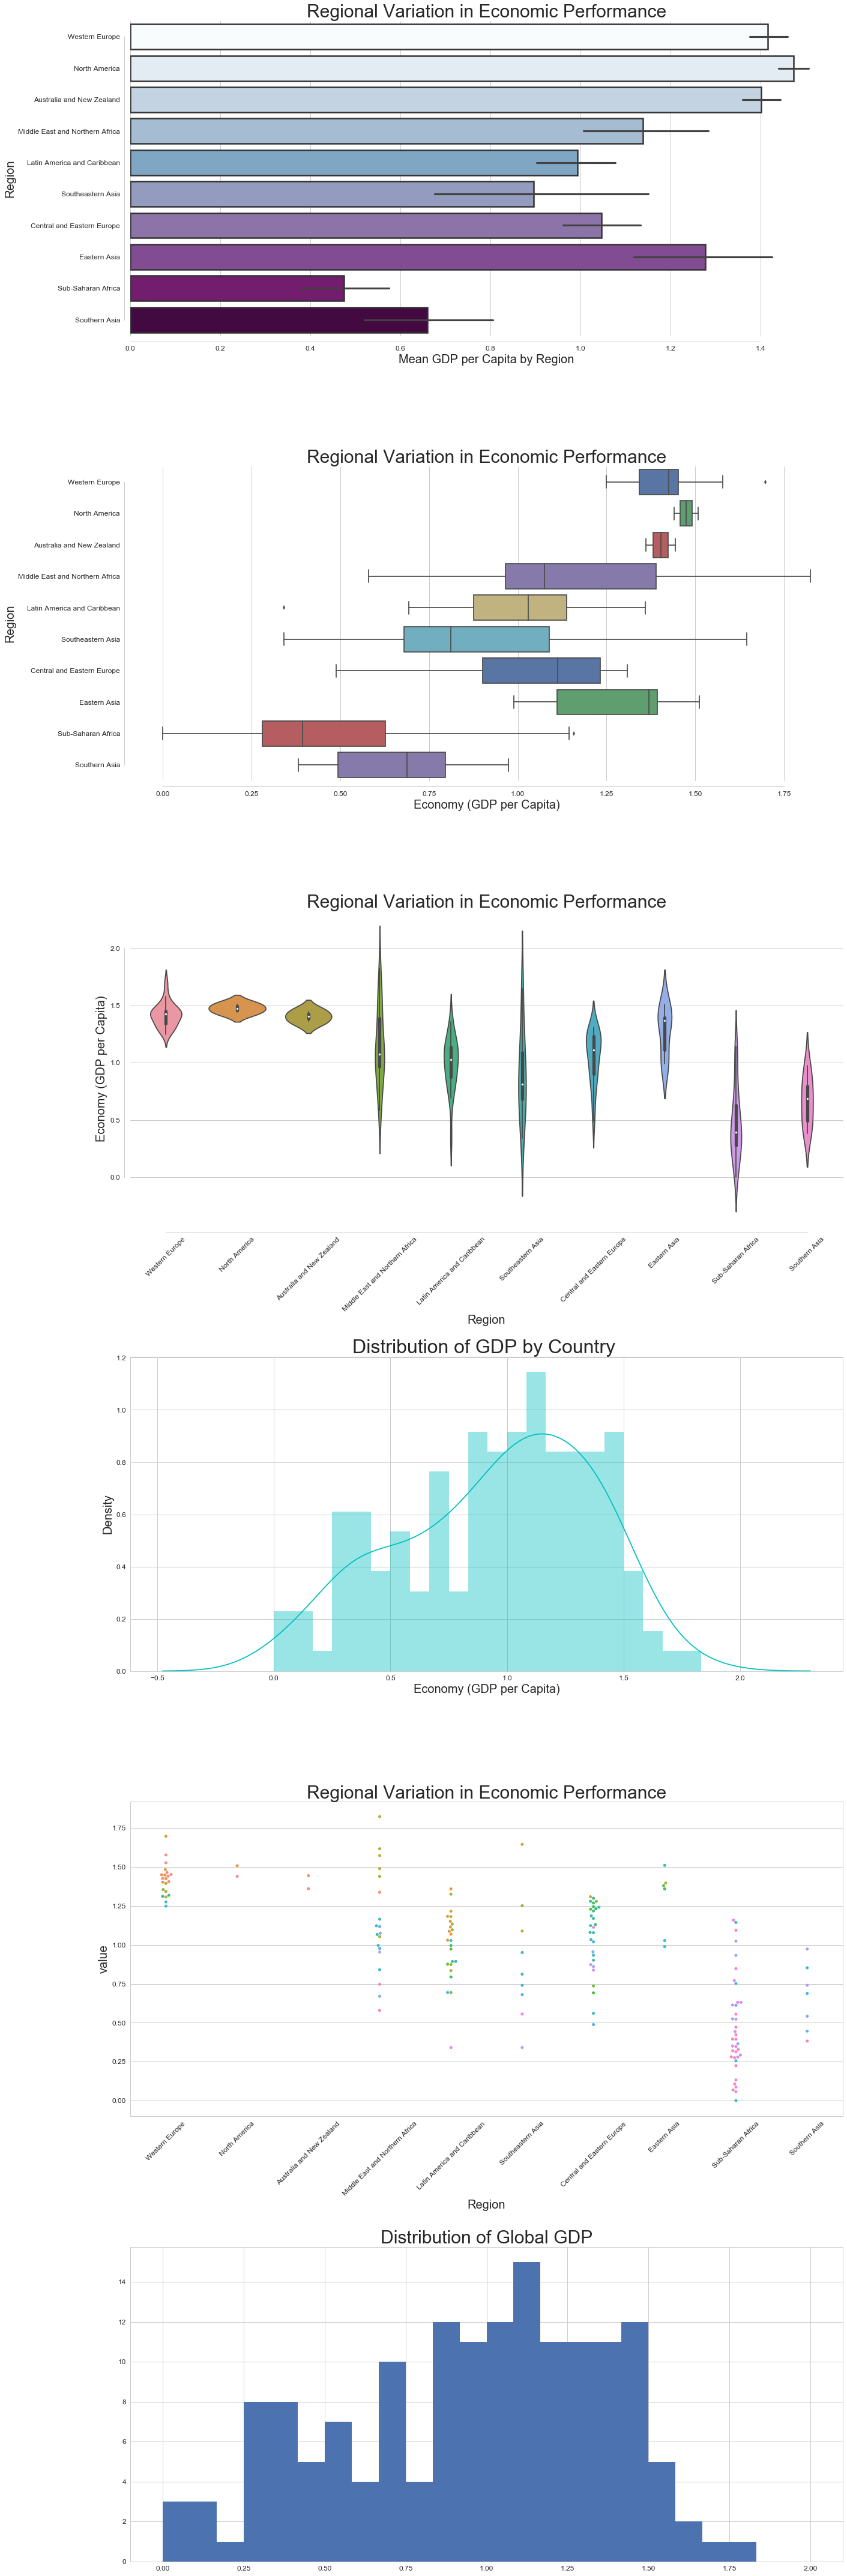

In [93]:
f, ax = plt.subplots(figsize=(20,60), sharex='row')
rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 30, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
plt.rcParams.update(**rc)

ax1=plt.subplot(611)
colors = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#74a9cf','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b']
sns.barplot(x="Economy (GDP per Capita)", y= "Region",data=df, palette=colors, linewidth=2.5, edgecolor='.2')
ax1.set(xlabel='Mean GDP per Capita by Region', title='Regional Variation in Economic Performance')


ax2=plt.subplot(612)
sns.boxplot(x="Economy (GDP per Capita)", y="Region",data=df, palette="deep")
ax2.set(title='Regional Variation in Economic Performance')
sns.despine()

ax3=plt.subplot(613)
sns.violinplot(x="Region", y="Economy (GDP per Capita)",data=df)
ax3.set_title('Regional Variation in Economic Performance')
sns.despine(offset=10, trim=True);
plt.xticks(rotation=45)

ax4=plt.subplot(614)
bins = np.linspace(0,2,25)
sns.set_style('whitegrid')
sns.color_palette("BuGn_r")
x=df['Economy (GDP per Capita)']
ax4.set_title('Distribution of GDP by Country ', fontsize = '32')
ax4.set(xlabel='Relative GDP per Capita (in PPP adjusted International Money)', ylabel='Density')
sns.distplot(x, bins, color = 'c')


ax4=plt.subplot(615)
# "Melt" the dataset to "long-form" or "tidy" representation
df_melt = pd.melt(df, id_vars=['Country','Region'], value_vars=['Economy (GDP per Capita)'])

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="Region", y="value", hue="Country", data=df_melt)
ax4.legend_.remove()
ax4.set_title('Regional Variation in Economic Performance')
plt.xticks(rotation=45)

ax4=plt.subplot(616)
bins = np.linspace(0,2,25)
plt.hist(df['Economy (GDP per Capita)'], bins)
ax4.set_title('Distribution of Global GDP')
plt.tight_layout()